In [1]:
from wave_1d_fd_abc import propagators, test_wave_1d_fd_abc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
src_freq_max = 25
ntaper = 100
param = 3.0 * src_freq_max * np.log (1000.0) / (2.0 * ntaper)
profile = (np.arange(0, ntaper))**2 * param
profile = np.gradient(profile)
#profile = np.ones(ntaper)

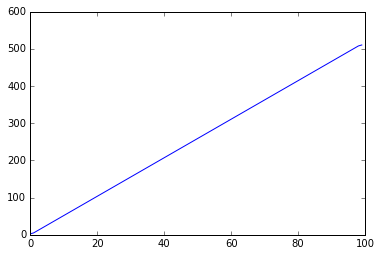

In [3]:
plt.plot(profile)

In [4]:
#param

In [5]:
model = test_wave_1d_fd_abc.model_one(500)
v = propagators.Pml(model['model'], model['dx'], model['dt'], 100, profile=profile)#, profile=10*np.ones(100, dtype=np.float32))

In [6]:
y = v.steps(model['nsteps'], model['sources'], model['sx'])

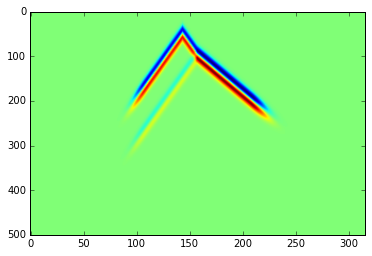

In [7]:
plt.imshow(y[:,:], aspect='auto')

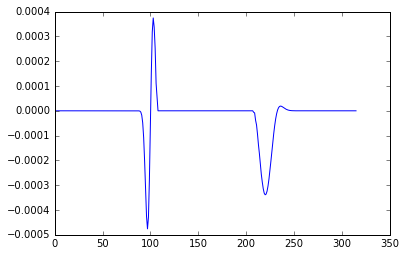

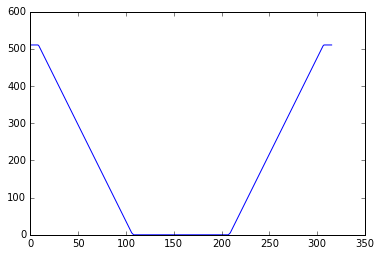

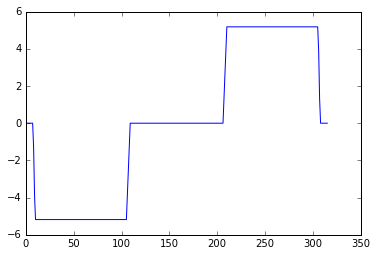

In [8]:
plt.plot(v.current_phi)
plt.figure();plt.plot(v.sigma)
plt.figure();plt.plot(v.sigma_x)

In [9]:
model = test_wave_1d_fd_abc.model_one(500)
v = propagators.Oneway(model['model'], model['dx'], model['dt'])
y = v.steps(model['nsteps'], model['sources'], model['sx'])

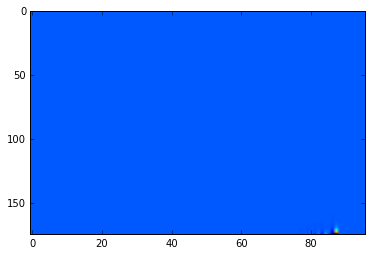

In [10]:
plt.imshow(y[:175,60:], aspect='auto')